In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%reload_ext version_information
np.__version__, pd.__version__

('1.15.4', '0.23.4')

In [2]:
# The Fish Data Set
# See example 2 from https://stats.idre.ucla.edu/r/dae/zip/ 
#"nofish","livebait","camper","persons","child","xb","zg","count"
import os
from urllib.request import urlretrieve
if not os.path.isfile('fishing.npz'):
    print("Downloading")
    urlretrieve('http://www-home.htwg-konstanz.de/~oduerr/data/fishing.npz',filename = 'fishing.npz')
d = np.load('fishing.npz')
Xt = d['Xt'] #"livebait","camper","persons","child"
Xte = d['Xte']
yt = d['yt']
yte = d['yte']
pd.DataFrame(Xt[0:2])

,0,1,2,3
0,1.0,0.0,4.0,0.0
1,1.0,1.0,2.0,0.0


<h3>a) Do a linear regression by creating a design matrix with the intercept term and use the fomulae given in the lecture to determine the coefficients on the training set.</h3>

In [3]:
d = {'livebait': Xt[:,0], 'camper': Xt[:,1], 'persons': Xt[:,2], 'child': Xt[:,3]}
df = pd.DataFrame(data=d)
df.insert(0, 'Intercept',np.ones((np.shape(df)[0],1)))

In [4]:
df.head()

,Intercept,livebait,camper,persons,child
0,1.0,1.0,0.0,4.0,0.0
1,1.0,1.0,1.0,2.0,0.0
2,1.0,1.0,1.0,3.0,0.0
3,1.0,1.0,1.0,3.0,2.0
4,1.0,1.0,1.0,4.0,1.0


In [5]:
# Geht einfacher, ohne den Zwischenschritt über pandas, mit np.concatenate, aber so ist das anschaulicher
xt = np.asmatrix(df)

In [6]:
N = yt.shape[0]  #200
yt.shape, xt.shape

((200,), (200, 5))

In [7]:
w = np.ones((xt.shape[1])) #Setting w = 1

In [8]:
XTX = np.matmul(xt.T,xt)
XTXI = np.linalg.inv(XTX)
XTXIXT = np.matmul(XTXI, xt.T)
w = np.matmul(XTXIXT,yt)
w

matrix([[-8.49222821,  2.4822138 ,  2.95430727,  4.64953914, -5.47160051]])

<h3>b) Repeat a) but this time with <code>LinearRegression</code> from <code>sklearn.linear_model</code></h3>

In [9]:
from sklearn.linear_model import LinearRegression
model_skl = LinearRegression(fit_intercept=False) #We have an extended X
model_skl.fit(xt,yt)
model_skl.coef_

array([-8.49222821,  2.4822138 ,  2.95430727,  4.64953914, -5.47160051])

Result: array([-8.49222821, 2.4822138 , 2.95430727, 4.64953914, -5.47160051]) Don't forget the intercept, you should have 5 numbers!

<h3>c) Determine the Root Mean Square Error (RMSE) and the average negative log-likelihood (NLL) on the testset. For NLL we assume that the conditional probability distrubution (CPD) $p(y|x)$ is given by the density of a Gaussian with constant variance $\sigma^2$. Estimate $\sigma^2$ using the variance of the residuals. Use the variance estimation with $1/N$.</h3>

In [10]:
y = np.matrix(yte).T
w = w.T
inter = np.ones((np.shape(Xte)[0],1))
xte = np.concatenate((inter, Xte), axis = 1)

RSME: 8.58812638673423


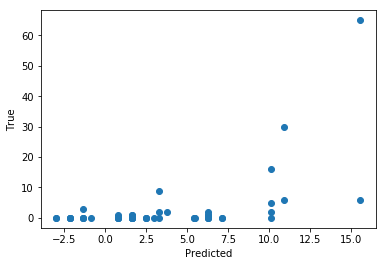

In [11]:
y_pred = np.matmul(xte,w)
plt.scatter([y_pred[:,0]], [y[:,0]])
plt.xlabel('Predicted')
plt.ylabel('True')

print('RSME:', np.sqrt(np.mean(np.power((y_pred - y),2))))

In [12]:
#TODO: ?????

Result: $ RMSE \approx 8.58812$, $\hat \sigma^2 \approx 73.7559$, $\tt{NLL} \approx 3.569$

<h3>d) For the testset: plot the predicted mean number of fish caught ($\mu$) against observed number of fish caught. Further include the 2.5 and 97.5 precentile of p(y|x), the conditional predictive distribution (CPD) of $y$ for a given $x$. Why is a Gaussian not ideal for that kind of data?</h3>

Hint: For the Gaussian the 2.5% and the 97.5% percentile is approximatiy given by $\mu \pm 1.96*\sigma$

<h3>e) This data is count data. Count data has only positive values and also the distribution is discrete. You cannot catch 0.5 fish and that the CPD has probability density > 0 on negative number of fish is wrong too. A Gaussian as a CPD is therefore not ideal.

Now use a Poissonian as CPD. If we assume a Poissonian then the probability to catch $k$ fish is given by$$
  p(k) = \exp(-\mu) \frac{\mu^k}{k!}
$$

and the NLL is thus by:

$$
 log(p(k)) = -\mu  + k \cdot \log(\mu) - log(k!)
$$
with $\mu$ being the expectation. In our case the average number of fish expected.

In the case of the probabilistic interpretation of the linear regression, $y_i$ for a given $x_i$ is distributed like a Gaussian. The paramter $\mu_i$ from $N(\mu_i,\sigma^2)$ has been determined from $x_i$ via $\mu_i= \beta^T \cdot x_i$ by minimizing the NLL.

A small additional detail: For the Poissonian case, $\mu_i$ needs to be positive. We therefore do not use $\beta^T \cdot x_i$ directly but "pipe it through" an exponential first to make it positive and thus link $\mu_i=exp(\beta^T \cdot x_i)$ to the data.

Use a gradient descent approach on the NLL to find the solution for the parameters. Calculate the RMSE and the NLL on the test set and compare with c).</h3>

Hint: On the trainingset for the parameter values (1,1,1,1,1) the NLL should be approx 1508 and the gradient (1518.61, 1403.99, 1171.02, 5701.91, 3258.7). For the NLL a good learning rate would be 0.001 and training should be done for at least 5000 epochs.

<h3>f) Do the same plot as in d) but this time with a Poisson CPD. Hint you can use scipy.stats.poisson to calculate the percentiles.</h3>

In [13]:
%version_information numpy, pandas

Software versions
Python 3.7.0 64bit [MSC v.1912 64 bit (AMD64)]
IPython 6.5.0
OS Windows 10 10.0.18362 SP0
numpy 1.15.4
pandas 0.23.4
Sun Nov 17 11:26:09 2019 Mitteleuropäische Zeit